## Pyplot Tutorial

### matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

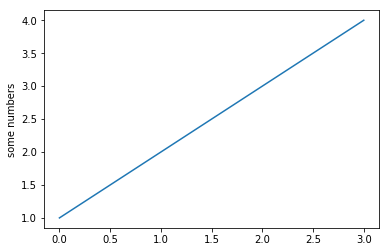

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

#### You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

plot() is a versatile command, and will take an arbitrary number of arguments. 
<br/>For example, to plot x versus y, you can issue the command:

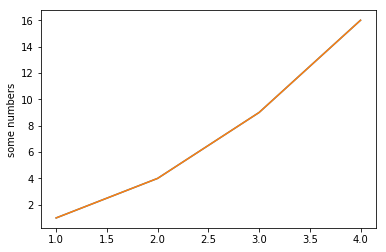

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('some numbers')
plt.show()

For every x, y pair of arguments, there is an optional 3rd argument which is the format string that indicates the color and line type of the plot. <br/>The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. <br/>The default format string is ‘b-‘, which is a solid blue line. <br/>For example, to plot the above with red circles, you would issue:

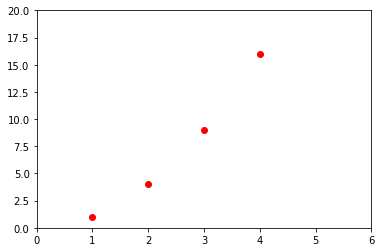

In [4]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

#### If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. <br/>The example below illustrates a plotting several lines with different format styles in one command using arrays.

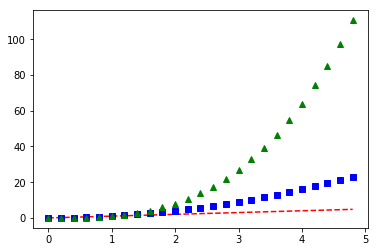

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. <br/>All plotting commands apply to the current axes. 

#### subplot(nrows, ncols, plot_number)
<br/>Where nrows and ncols are used to notionally split the figure into nrows * ncols sub-axes, and plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols.

In the case when nrows, ncols and plot_number are all less than 10, a convenience exists, such that the a 3 digit number can be given instead, where the hundreds represent nrows, the tens represent ncols and the units represent plot_number. For instance:<br/>
<b>subplot(211)</b>
<br/>produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 row by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

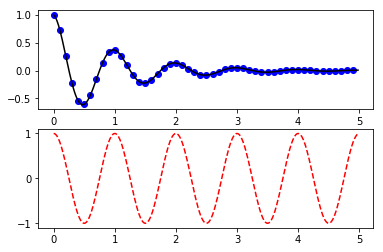

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) #Optional - default

# subplot(numrows, numcols, fignum) where fignum ranges from 1 to numrows*numcols.
# subplot(nrows, ncols, plot_number)

plt.subplot(211) # identical to subplot(2, 1, 1)

plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212) # identical to subplot(2, 1, 2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

C:\Users\AnindyaPC\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


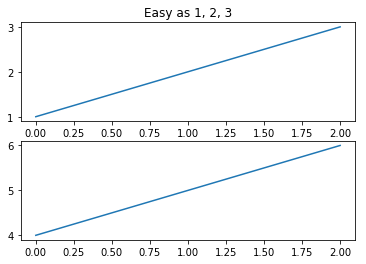

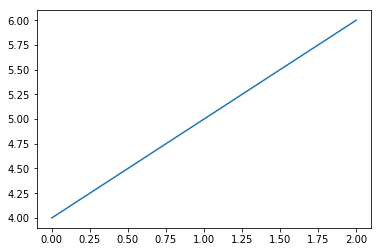

In [9]:
import matplotlib.pyplot as plt

plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

#### If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

### Working with text

The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations

C:\Users\AnindyaPC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


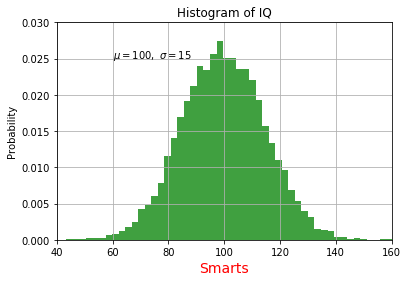

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts', fontsize=14, color='red')
plt.ylabel('Probability')
plt.title('Histogram of IQ')

# The 'r' preceding the title string is important – 
# it signifies that the string is a raw string and 
# not to treat backslashes as python escapes.
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Logarithmic and other nonlinear axes

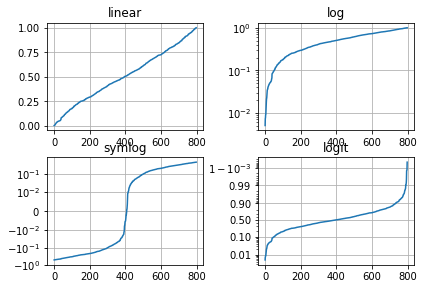

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()